Question 1

- Standard Deviation shows the variability in a singular data point.
- Standard Error of the mean shows the variability of a sample mean. 
- SEM will always be smaller than SD because it is divided by the square root in the SEM equation. This results in the sample size increasing, total SEM decreases, resulting in a better estimate. 

Question 2

Using the following steps, we can answer the question,
1. Calculate the standard error of the mean using the formula SEM = SD / root N where N is the sample size, and SD is the standard deviation of the sample.
2. Finding the critical value for 95% confidence
3. Multiply SEM by the critical value.
4. Compute the confidence interval 

Question 3

Using Bootstrapped Sample Means

1. Generate Bootstrap Samples:
Using the distribution of the bootstrapped sample means to estimate the SEM. Here's how:

- Randomly resample the dataset multiple times to create new datasets and then calculate the mean for each indivdual bootstrap sample.

2. Compute the Standard Error from Bootstrapped Means:
- The standard error of the bootstrapped sample means is the standard deviation of the means from the bootstrapped samples:
 
3. Find the 95% Confidence Interval from Bootstrapped Data:
- Percentile method: Sort the bootstrapped sample means and select the 2.5th and 97.5th percentiles of the means to form the confidence interval. 

- Using SEM: You can still use the calculated SEM from bootstrapping to build the interval by multiplying it by 1.96 (assuming the distribution of means is approximately normal).

This approach provides 95% of the bootstrapped sample means. The percentile method is often preferred.

Question 4

In [1]:
import numpy as np

# Define a function for bootstrap sampling and calculating confidence intervals
def bootstrap_confidence_interval(sample, stat_function, num_bootstrap_samples=1000, confidence_level=0.95):
    """
    Computes the bootstrap confidence interval for a population parameter (mean, median, etc.).

    Parameters:
    - sample: The original dataset/sample (1D numpy array or list)
    - stat_function: A function that calculates the population statistic (e.g., np.mean, np.median)
    - num_bootstrap_samples: The number of bootstrap resamples to generate (default is 1000)
    - confidence_level: The confidence level for the interval (default is 95%)

    Returns:
    - confidence_interval: A tuple representing the lower and upper bounds of the confidence interval
    """

    # Store the bootstrapped sample statistics
    bootstrap_stats = []

    # Bootstrap resampling process
    for _ in range(num_bootstrap_samples):
        # Resample with replacement from the original sample
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        # Calculate the statistic (mean, median, etc.) for the resample
        bootstrap_stat = stat_function(bootstrap_sample)
        # Store the result
        bootstrap_stats.append(bootstrap_stat)

    # Convert the list to a numpy array for easy percentile calculations
    bootstrap_stats = np.array(bootstrap_stats)

    # Calculate the percentiles corresponding to the confidence level
    lower_percentile = (1 - confidence_level) / 2 * 100
    upper_percentile = (confidence_level + (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(bootstrap_stats, lower_percentile)
    upper_bound = np.percentile(bootstrap_stats, upper_percentile)

    return (lower_bound, upper_bound)

# Example: Generating a sample and calculating the bootstrap confidence interval for the mean
np.random.seed(42)  # Set seed for reproducibility
sample = np.random.normal(loc=50, scale=10, size=100)  # Generating a random normal sample

# Call the function to compute a 95% confidence interval for the mean
ci_mean = bootstrap_confidence_interval(sample, np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# To change this for another parameter, say the median, simply pass np.median as the stat_function argument
ci_median = bootstrap_confidence_interval(sample, np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")

# Similarly, you can compute for the variance or any other statistic:
# For variance
ci_variance = bootstrap_confidence_interval(sample, np.var)
print(f"95% Bootstrap Confidence Interval for the Variance: {ci_variance}")


95% Bootstrap Confidence Interval for the Mean: (47.276635751407504, 50.62851486440195)
95% Bootstrap Confidence Interval for the Median: (46.98896304410711, 51.10922589709866)
95% Bootstrap Confidence Interval for the Variance: (60.23075115573288, 102.67790080161201)


- A random sample is generated using np.random.normal().

- The bootstrap_confidence_interval() function is called with np.mean to compute the confidence interval for the mean.

- To compute the confidence interval for other parameters like the median or variance, pass the appropriate function (e.g., np.median, np.var) as the second argument.

Question 5

The population parameter is the fixed with an unknown quantity we want to estimating.
The sample statistic is our estimate of the parameter, which varies with each sample.
Confidence intervals help connect the sample statistic and the population parameter, providing a range of values for the population parameter based on the sample.

Question 6

1.
Step 1: Take the original sample and randomly select data points with replacements to create a new bootstrap sample. It’s the same size as your original sample, but it’s like a scrambled version with some repeated data points.

Step 2: You do this process usually 1,000 or more times. For each of these new bootstrap samples, you calculate the statistic desired, like mean or median.

Step 3: Looking at all the bootstrapped results to understand how much that statistic changes if you were to take  different samples from the population.

2.
The main point of bootstrapping is to estimate how uncertain your sample statistics are when you generalize a population. Basically, it gives you an idea of how reliable your estimates are.

3.
Step 1: Use the sample and create new samples by resampling from your original amount of people with replacement. For each of these resampled datasets, you calculate the average height.

Step 2: After doing this all bootstrapped samples, you now have a certain number of averages. This shows how the average might change if you sampled more.

Step 3: Use the bootstrapped data to make a confidence interval. An example can be caculating a 95% confidence interval for the average height based on these bootstrapped samples. This interval would be between 168 cm and 172 cm.

Now, you compare your hypothesized guess to this interval. If your hypothesized average is inside this interval, then it’s the guess is accurate. If 170 cm falls outside this interval (let’s say the interval was 162 cm to 167 cm), then your guess might not be very accurate.



Question 7


- Fail to reject the null hypothesis: If zero is inside the confidence interval, you cannot rule out the possibility the true effect could be zero.
- Reject the null hypothesis: If zero is not in the confidence interval, you have enough evidence to say the true effect is different from zero.

Even if the observed sample mean isn’t zero, the confidence interval helps you decide whether or not zero is a accurate value for the true effect in the population.

Question 8

95% Bootstrap Confidence Interval for the Mean Change in Health Score: (0.8, 5.5)


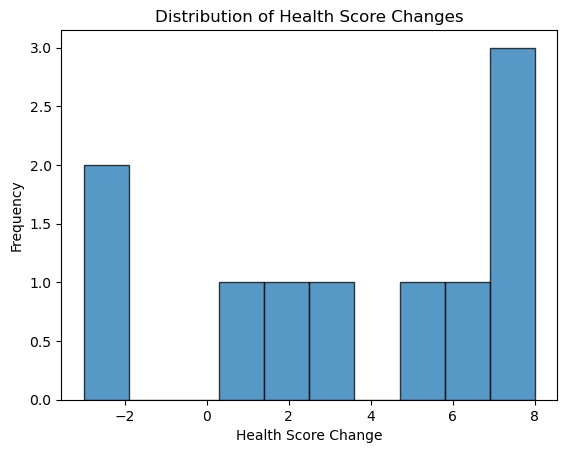

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate the change in health score (Final - Initial)
data['HealthChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Define the bootstrapping function
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95):
    """
    Bootstrap the data to generate a confidence interval for the mean of a sample.

    Parameters:
    - data: A 1D array or list of sample data
    - num_bootstrap_samples: Number of bootstrap resamples (default is 1000)
    - confidence_level: The desired confidence level (default is 95%)

    Returns:
    - confidence_interval: A tuple with the lower and upper bounds of the confidence interval
    """
    # Generate bootstrapped means
    bootstrap_means = []
    for _ in range(num_bootstrap_samples):
        # Resample with replacement from the original data
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the mean of the resample
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    # Calculate the confidence interval
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (confidence_level + (1 - confidence_level) / 2) * 100)
    
    return (lower_bound, upper_bound)

# Perform bootstrapping on the health score changes
health_changes = data['HealthChange'].values
ci = bootstrap_confidence_interval(health_changes)

# Print the results
print(f"95% Bootstrap Confidence Interval for the Mean Change in Health Score: {ci}")

# Plot the bootstrap distribution for visualization
plt.hist(health_changes, bins=10, alpha=0.75, edgecolor='black')
plt.title("Distribution of Health Score Changes")
plt.xlabel("Health Score Change")
plt.ylabel("Frequency")
plt.show()



Explanation of the Code:

- Load Data: We create a pandas DataFrame with the provided patient data, including initial and final health scores.

- Calculate Health Change: We compute the difference between the final and initial health scores for each patient.

- Bootstrap Function: The bootstrap_confidence_interval function resamples the data (with replacement) and computes the mean of each resample to generate a distribution of the sample means.

- Confidence Interval: The 95% confidence interval is determined from the bootstrapped distribution.

- Interpretation: We print the confidence interval and visualize the distribution of health score changes.

Question 9

Yes

ChatGPT link: https://chatgpt.com/share/66feb081-3288-800b-af31-3054471838ff